# 二分查找

In [ ]:
nums = [5,7,7,8,8,10]
target = 8

index_left = 0
index_right = len(nums) -1
while index_left <= index_right:
    index_center = int((index_left + index_right)/2)
    if nums[index_center] >= target:
        index_right = index_center - 1
    else:
        index_left = index_center + 1

print(index_left)

> Exercises:
- [34. 在排序数组中查找元素的第一个和最后一个位置](https://leetcode.cn/problems/find-first-and-last-position-of-element-in-sorted-array/)
- [704. 二分查找](https://leetcode.cn/problems/binary-search/)

# [56. 合并区间](https://leetcode.cn/problems/merge-intervals/)
以数组$intervals$表示若干个区间的集合，其中单个区间为$intervals[i] = [start_i, end_i]$。请你合并所有重叠的区间，并返回**一个不重叠的区间数组，该数组需恰好覆盖输入中的所有区间**。

In [ ]:
intervals = [[2,6],[1,3],[8,10],[15,18]]

intervals.sort()
output = [intervals[0]]
for ii in range(1,len(intervals)):
    if output[-1][1] < intervals[ii][0]:
        output.append(intervals[ii])
    else:
        output[-1][1] = max(output[-1][1],intervals[ii][1])

print(output)

In [ ]:
#include <vector>
#include <algorithm>
#include <iostream>

std::vector<std::vector<int>> intervals = {{1,3},{2,6},{8,10},{15,18}};

sort(intervals.begin(), intervals.end());
std::vector<std::vector<int>> output = {intervals[0]};
for (int ii = 1; ii < intervals.size(); ii++) {
    if (output.back()[1] < intervals[ii][0]) {
        output.emplace_back(intervals[ii]);
    }
    else {
        output.back()[1] = std::max(output.back()[1], intervals[ii][1]);
    }
}

for (auto interval : output) {
    std::cout << interval[0] << ", " << interval[1] << std::endl;
}

# 双指针

## [15. 三数之和](https://leetcode.cn/problems/3sum/)
给你一个整数数组$nums$，判断是否存在三元组$[nums[i], nums[j], nums[k]]$满足$i != j$、$i != k$且$j != k$，同时还满足$nums[i] + nums[j] + nums[k] == 0$。请你返回所有和为$0$且不重复的三元组。

注意：答案中不可以包含重复的三元组。

In [ ]:
nums = [-1,0,1,2,-1,-4]

record = []
nums.sort()
if len(nums) > 2:
    for ii in range(len(nums)-2):
        index_left = ii+1
        index_right = len(nums)-1
        while index_left < index_right:
            if nums[index_left] + nums[index_right] < -nums[ii]:
                index_left += 1
            elif nums[index_left] + nums[index_right] > -nums[ii]:
                index_right -= 1
            else:
                if [nums[ii],nums[index_left],nums[index_right]] not in record:
                    record.append([nums[ii],nums[index_left],nums[index_right]])
                index_left += 1
                index_right -= 1
print(record)

## [18. 四数之和](https://leetcode.cn/problems/4sum/)
给你一个由$n$个整数组成的数组$nums$，和一个目标值$target$。请你找出并返回满足下述全部条件且**不重复**的四元组$[nums[a], nums[b], nums[c], nums[d]]$（若两个四元组元素一一对应，则认为两个四元组重复）：

* $0 <= a, b, c, d < n$
* $a$、$b$、$c$和$d$**互不相同**
* $nums[a] + nums[b] + nums[c] + nums[d] == target$

你可以按**任意顺序**返回答案 。

In [ ]:
nums = [1,0,-1,0,-2,2]
target = 0

nums.sort()
record = []
if len(nums) > 3:
    for ii in range(len(nums)-3):
        for jj in range(ii+1,len(nums)-2):
            index_left = jj + 1
            index_right = len(nums) - 1
            while index_left < index_right:
                if nums[index_left] + nums[index_right] < target - nums[ii] - nums[jj]:
                    index_left += 1
                elif nums[index_left] + nums[index_right] > target - nums[ii] - nums[jj]:
                    index_right -= 1
                else:
                    if [nums[ii],nums[jj],nums[index_left],nums[index_right]] not in record:
                        record.append([nums[ii],nums[jj],nums[index_left],nums[index_right]])
                    index_left += 1
                    index_right -= 1
print(record)

## [11. 盛最多水的容器](https://leetcode.cn/problems/container-with-most-water/)
移动数字较小的那个指针

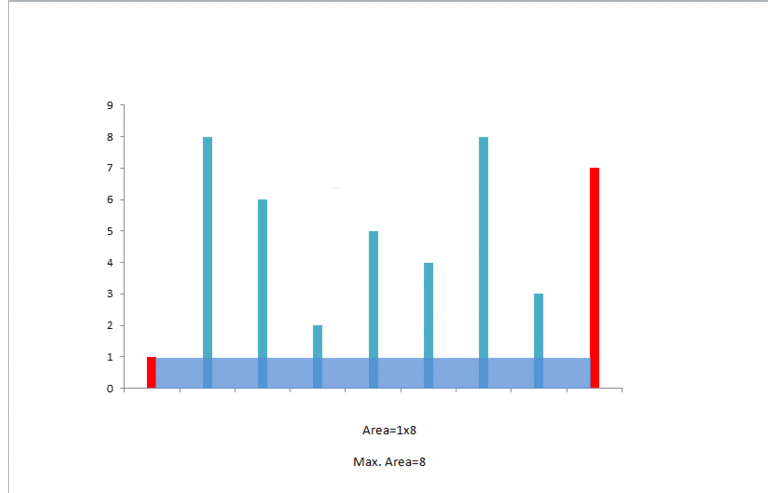
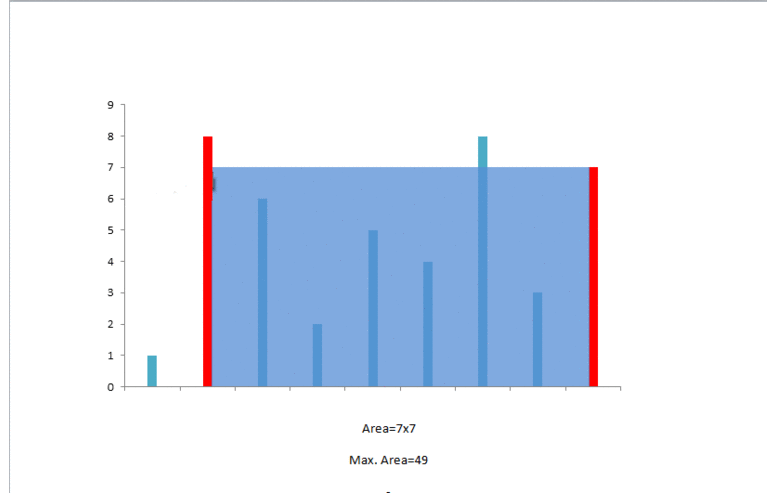
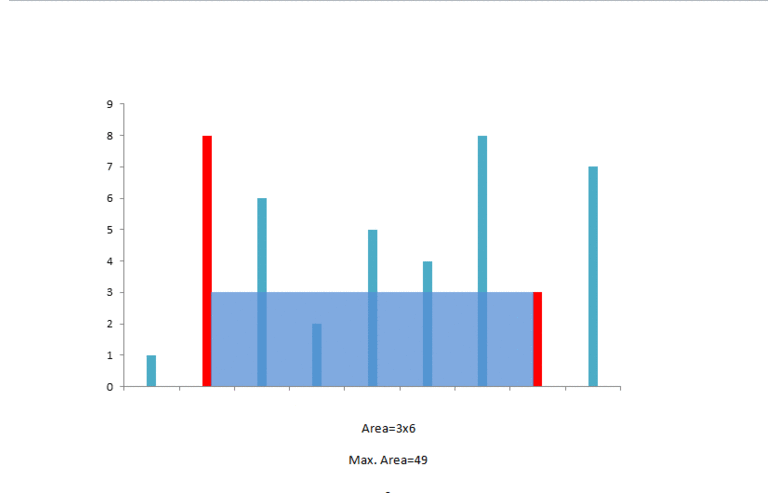
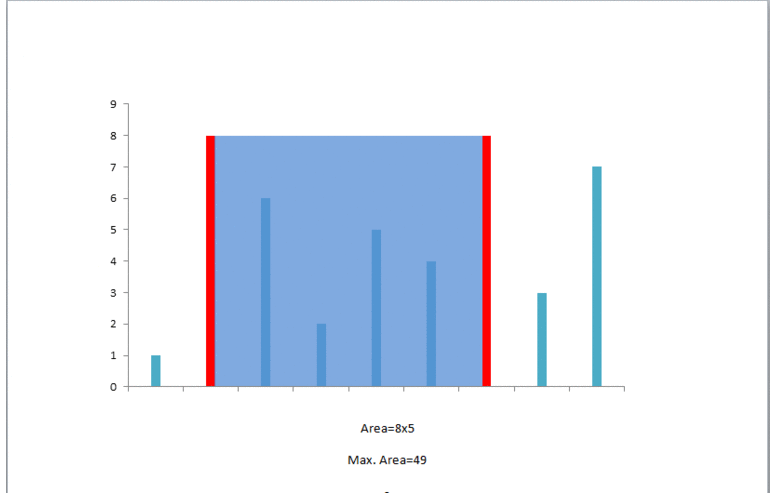
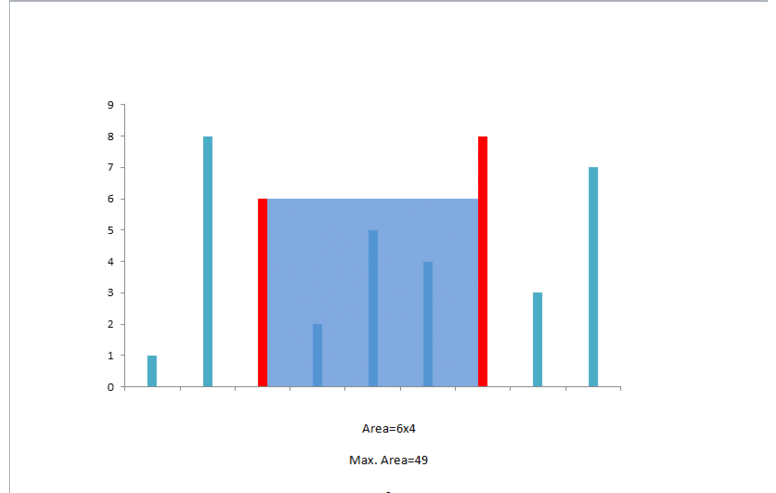
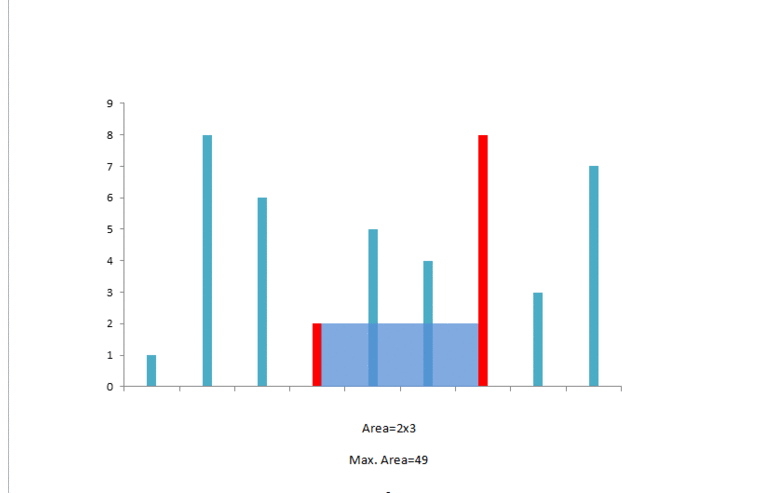
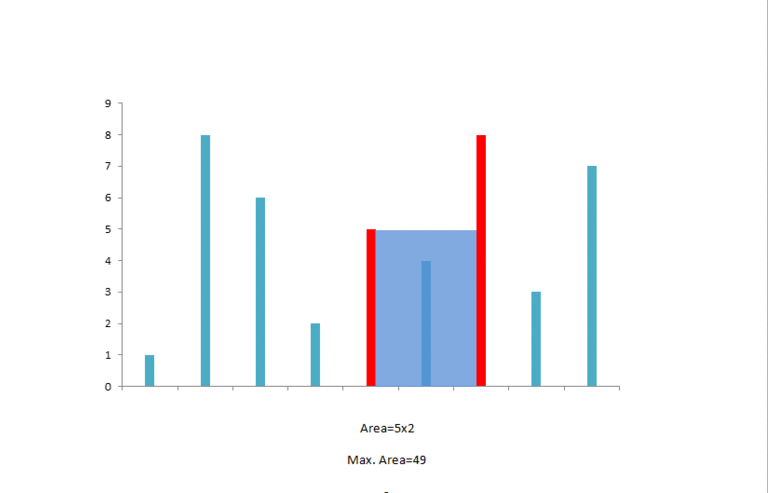
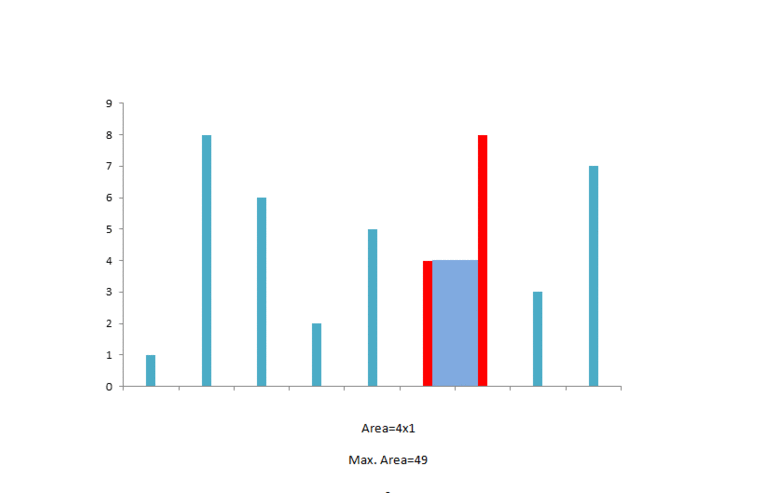

# BFS & DFS

## BFS

- [200. 岛屿数量](https://leetcode.cn/problems/number-of-islands/)
- [130. 被围绕的区域](https://leetcode.cn/problems/surrounded-regions/)

# [633. 平方数之和](https://leetcode.cn/problems/sum-of-square-numbers/)
给定一个非负整数$c$，你要判断是否存在两个整数$a$和$b$，使得$a^2 + b^2 = c$。

In [ ]:
import math
def judgeSquareSum(c):
    for a in range(int(math.sqrt(c)) + 1):
        b = math.sqrt(c - a * a)
        if b == int(b):
            return True
    return False
judgeSquareSum(5)

In [ ]:
#include <iostream>

bool judgeSquareSum(int c) {
    for (long a = 0; a * a <= c; a++) {
        double b = sqrt(c - a * a);
        if (b == int(b)) {
            return true;
        }
    }
    return false;
}
std::cout << judgeSquareSum(5) << std::endl;

# [1010. 总持续时间可被 60 整除的歌曲](https://leetcode.cn/problems/pairs-of-songs-with-total-durations-divisible-by-60/)
在歌曲列表中，第 i 首歌曲的持续时间为 time[i] 秒。  
返回其总持续时间（以秒为单位）可被 60 整除的歌曲对的数量。形式上，我们希望下标数字 i 和 j 满足  i < j 且有 (time[i] + time[j]) % 60 == 0。

**思路**

需要返回其总持续时间（以秒为单位）可被60整除的歌曲对的数量，因此，每首歌曲对结果的影响因素是它的持续时间除以 60 后的余数。可以用一个长度为 60 的数组 cnt，用来表示余数出现的次数。然后分情况统计歌曲对：

> 1.余数为 0 的歌曲。他们需要与余数为 0 的歌曲组成对，但不能与自己组成对。歌曲对的数量为 $cnt[0]×(cnt[0]−1)/2$。  
> 2.余数为 30 的歌曲。他们需要与余数为 30 的歌曲组成对，但不能与自己组成对。歌曲对的数量为 $cnt[30]×(cnt[30]−1)/2$。  
> 3.余数为 i,i∈[1,29] 的歌曲。他们需要与余数为 60−i 的歌曲组成对。歌曲对的数量为$\sum_{i=1}^{29} cnt[i]×cnt[60−i]$。  
> 4.余数为 i,i∈[31,59] 的歌曲。已经在上一部分组对过，不需要重复计算。  

把这几部分求和，就可以得到最后的对数。

In [ ]:
class Solution(object):
    def numPairsDivisibleBy60(self, time):
        """
        :type time: List[int]
        :rtype: int
        """
        dict_count = {}
        for num in time:
            if num % 60 not in dict_count:
                dict_count[num % 60] = 0
            dict_count[num % 60] += 1
        count = 0
        for key in dict_count.keys():
            if key == 0 or key == 30:
                count += dict_count[key] * (dict_count[key] - 1) / 2
            elif 0 < key < 30:
                if 60 - key in dict_count:
                    count += dict_count[key] * dict_count[60-key]
        return count